tgb - 8/22/2019 - Figures and Tables for the conserving NN paper

# 1) Initialization

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
import tensorflow as tf
import tensorflow.math as tfm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag

# Otherwise tensorflow will use ALL your GPU RAM for no reason
limit_mem()

/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages

/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog


# 2) Load data to plot Figure 3a

In [2]:
TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
alpha_array = [0,0.01,0.25,0.5,0.75,0.99,1] # Loop over weight given to MSE and conservation constraints
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer,\
           'weak_loss_0':mse,'weak_loss_1':mse}
fz = 15
lw = 4
siz = 100
S0 = 320 # Representative mean solar insolation for normalization purposes
S0max = 1410.6442 # Max solar insolation for normalization purposes
SN = S0/100 # Representative target = mean insolation / 4
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YMIN = -1 # Representative value for conserving network
YTEXT = 0.3 # Text placement

In [3]:
MSEtp = {}; PENtp = {};

NN = {}; md = {};
NN = load_model(TRAINDIR+'HDF5_DATA/MLRL0.h5')
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/MLRL0md.pkl','rb'))
md.resid = pickle.load(open(TRAINDIR+'HDF5_DATA/MLRL0res.pkl','rb'))
MSEtp['MLRL0'] = np.log10(md.mse_W2m4().mean((0,1,2)))
PENtp['MLRL0'] = np.log10(0.25*(md.resid['mass']+md.resid['ent']+\
                                md.resid['sw']+md.resid['lw']).mean((0,1,2)))

for alpha in alpha_array:
    print('alpha = ',str(alpha))
    NN = {}; md = {};
    print('alpha = ',str(alpha))
    # 0) Define model/statistics to load
    config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
    dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer}
    # Path of model/statistics
    path_model = TRAINDIR+'HDF5_DATA/NNL'+str(alpha)+'.h5'
    
    data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
    path_md = TRAINDIR+'HDF5_DATA/NNL'+str(alpha)+'md.pkl'
    path_res = TRAINDIR+'HDF5_DATA/NNL'+str(alpha)+'res.pkl'

    # 1) Load model
    NN = load_model(path_model,custom_objects=dict_lay)

    # 2) Define and load md
    md = ModelDiagnostics(NN,config_fn,data_fn)
    md.stats = pickle.load(open(path_md,'rb'))

    # 3) Load res
    md.resid = pickle.load(open(path_res,'rb'))
    MSEtp[str(alpha)] = np.log10(md.mse_W2m4().mean((0,1,2)))
    PENALTY = 0.25*(md.resid['mass']+md.resid['ent']+\
                    md.resid['sw']+md.resid['lw']).mean((0,1,2))
    PENtp[str(alpha)] = np.log10(PENALTY)

NN = {}; md = {};
NN = load_model(TRAINDIR+'HDF5_DATA/JNNC.h5',custom_objects=dict_lay)
md = ModelDiagnostics(NN,config_fn,data_fn)
md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/JNNCmd.pkl','rb'))
md.resid = pickle.load(open(TRAINDIR+'HDF5_DATA/JNNCmdres.pkl','rb'))
MSEtp['NNA'] = np.log10(md.mse_W2m4().mean((0,1,2)))
PENtp['NNA'] = YMIN+0.1

W0831 11:24:24.253809 23016036534080 deprecation.py:506] From /home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 11:24:24.254651 23016036534080 deprecation.py:506] From /home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 11:24:24.257526 23016036534080 deprecation.py:506] From /home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros

alpha =  0
alpha =  0


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


alpha =  0.01
alpha =  0.01


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


alpha =  0.25
alpha =  0.25


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


alpha =  0.5
alpha =  0.5


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


alpha =  0.75
alpha =  0.75


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


alpha =  0.99
alpha =  0.99


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


alpha =  1
alpha =  1


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


# 3) Load data to plot Figure 3b

In [4]:
coor = xr.open_dataset("/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0000-01-01-00000.nc",\
                    decode_times=False)
lat = coor.lat; lon = coor.lon;
coor.close();

In [5]:
# Config and data files
config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
data_fn_a = ['/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc',
             '/local/Tom.Beucler/SPCAM_PHYS/8col009_14_valid.nc',
             '/local/Tom.Beucler/SPCAM_PHYS/8col009_31_valid.nc']
data_ref = ['','4K','3Kw1']
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer,\
           'weak_loss_0':mse,'weak_loss_1':mse,'MassConsLayer_choice': MassConsLayer_choice,\
            'EntConsLayer_choice': EntConsLayer_choice}
NNarray = ['JUnotC','JNNL','JNNC','MLRL0','JNNL0.01']

In [6]:
index = 0
var = 'Enthalpy'

if index==0:
    lat_ind = np.arange(0,64)
elif index==1:
    #lat_ind = [30,33]
    lat_ind = np.arange(0,64)

if var=='Water':
    Bdic = ['TOT','LHF','PREC','WAT']; 
    Rdic = ['TOT','PREC','WAT','CROSS']
elif var=='Enthalpy':
    Bdic = ['TOT','THERMO','RAD','PHAS','SHFLX'];
    Rdic = ['TOT','THERMO','RAD','PHAS','SHFLX','CROSS'];
    
import pickle
M = {}
for i,NNs in enumerate(NNarray):
    filename = '/local/Tom.Beucler/SPCAM_PHYS/HDF5_DATA/7_3_'+var+'_'+data_fn_a[index][-19:-1]+'_'+NNs+'.h5'
    hf = open(filename,'rb')
    M[NNs] = pickle.load(hf)

In [7]:
cplot = ['b','r','g']
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer,\
           'weak_loss_0':mse,'weak_loss_1':mse,'MassConsLayer_choice': MassConsLayer_choice,\
            'EntConsLayer_choice': EntConsLayer_choice}
NNplot = ['JNNL','JNNL0.01','JUnotC']
NNsREF = 'JNNC'
VAR = 'THERMO'

fz = 15
LAB = [r'$\mathrm{THERMO}$','','',r'$\mathrm{RESID}$','','']
lw = 3
siz = 50
S0 = 320 # Representative mean solar insolation for normalization purposes
S0max = 1410.6442 # Max solar insolation for normalization purposes
SN = S0/100 # Representative target = mean insolation / 4
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.175 # Text placement
YMIN = -1 # Representative value for conserving network
YTEXT = 0.3 # Text placement

# 4) Draw both figures on same plot

0 $-1$
1 $0$
2 $1$
3 $2$
4 $3$
5 $4$


/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/api/_v1/keras/models/__init__.py:74: RuntimeWarning: invalid value encountered in log10


0 $0$
1 $1$
2 $2$
3 $3$
4 $4$
5 $5$


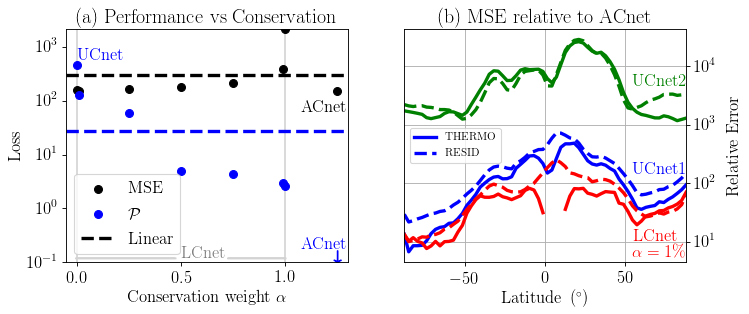

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

f = plt.figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.gcf().subplots_adjust(bottom=0.15) # Make room for xlabels

### Subplot 1 ###

ax = f.add_subplot(1,2,1)
MSEs = {}; PENs = {};

plt.axvline(x=0,color='lightgray',linewidth=lw/2,zorder=0)
plt.axvline(x=1,color='lightgray',linewidth=lw/2,zorder=0)

STR = 'MLRL0'
Hlin1 = plt.axhline(y=MSEtp[STR],c='k',linestyle='--',zorder=1)
Hlin2 = plt.axhline(y=PENtp[STR],c='b',linestyle='--',zorder=1)

for alpha in alpha_array:
    STR = str(alpha)
    MSEs[str(alpha)] = plt.scatter(alpha,MSEtp[STR],c='k',s=siz)
    PENs[str(alpha)] = plt.scatter(alpha,PENtp[STR],c='b',s=siz)

STR = 'NNA'
MSEs['NNA'] = plt.scatter(XNNA,MSEtp[STR],c='k',s=siz)
PENs['NNA'] = plt.scatter(XNNA,YMIN+0.1,c='b',s=3*siz,marker="$\downarrow$")
MSEt = plt.text(XNNA-XTEXT,MSEtp[STR]-YTEXT-0.1,s='$\mathrm{ACnet}$',color='k')
PENt = plt.text(XNNA-XTEXT,YMIN+0.1+YTEXT/2,s='$\mathrm{ACnet}$',color='b')
PENu = plt.text(0,2.75,s='$\mathrm{UCnet}$',color='b')
    
plt.xlim((-0.05,1.3))
plt.ylim((YMIN,3.33))

plt.xlabel(r'$\mathrm{Conservation\ weight\ }\alpha$')
plt.ylabel(r'$\mathrm{Loss}$')
#plt.title(r'$\mathrm{\left(a\right)\ Performance\ vs\ Conservation}$')
plt.title(r'$\mathrm{\left(a\right)\ }\textnormal{Performance\ vs\ Conservation}$')

plt.legend((MSEs['0'],PENs['0'],Hlin1),\
           ('MSE','$\cal{P}$','Linear'),
          loc='lower left')
# plt.legend((MSEs['0'],PENs['0']),\
#            ('Performance loss','Conservation loss'),\
#           loc='lower left')
# plt.legend((MSEs['0'],PENs['0'],MSEs['NNA'],PENs['NNA']),\
#            ('MSE','$\cal{P}$','MSE NNA','$\cal{P}\ \mathrm{NNA}$'))

# Add LCnet legend
plt.arrow(0.475, -0.925, -0.475, 0, color='lightgray', linewidth=lw/2)
plt.arrow(0.725, -0.925, 0.275, 0, color='lightgray', linewidth=lw/2)
PENu = plt.text(0.5,-0.925,s='$\mathrm{LCnet}$',color='gray')

plt.draw()
# Change y labels to 10^n
labels = [item.get_text() for item in ax.get_yticklabels()]
for ilab,lab in enumerate(labels):
    print(ilab,lab)
    labels[ilab]='$10^{'+lab[1:-1]+'}$'
ax.set_yticklabels(labels)

### Subplot 2 ###

ax = f.add_subplot(1,2,2)
MSEs = {}; PENs = {};


REF = M[NNsREF]['error']['THERMO'][:,:,0].mean(axis=1)

ETHERMOs = {}; ETOTs = {};
for imodel,NNs in enumerate(NNplot):
    ETHERMOs[NNs] = plt.plot(coor.lat,\
                             np.log10(M[NNs]['error'][VAR][:,:,0].mean(axis=1)-REF),\
                             color=cplot[imodel],label=LAB[imodel])
    ETOTs[NNs] = plt.plot(coor.lat,\
                          np.log10(M[NNs]['error']['TOT'][:,:,0].mean(axis=1)),\
                          color=cplot[imodel],linestyle='--',label=LAB[np.size(NNplot)+imodel])

plt.grid()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.xlim((np.min(coor.lat),np.max(coor.lat)))

# Text
N2NETt = plt.text(54,3.65,s='$\mathrm{UCnet2}$',color='g')
NNETt = plt.text(54,2.15,s='$\mathrm{UCnet1}$',color='b')
LCNETt = plt.text(55,1,s='$\mathrm{LCnet}$',color='r')
LCNETt2 = plt.text(54,0.75,s='$\\alpha=1\\% $',color='r')

# plt.ylim((YMIN,3.33))
plt.xlabel(r'$\mathrm{Latitude\ \left(^{\circ}\right)}$')
plt.ylabel(r'$\mathrm{Relative\ Error}$',labelpad=10)
plt.title(r'$\mathrm{\left(b\right)\ }\textnormal{MSE\ relative\ to\ ACnet}$')
plt.legend(loc='center left',fontsize=2*fz/3)

plt.draw()
# Change y labels to 10^n
labels = [item.get_text() for item in ax.get_yticklabels()]
for ilab,lab in enumerate(labels):
    print(ilab,lab)
    labels[ilab]='$10^{'+lab[1:-1]+'}$'
ax.set_yticklabels(labels)

# Save figure
plt.savefig('Fig3',format='pdf')

# 5) Generate tex code for Table 1 automatically

In [9]:
# Choose table to make
#TABLE = 'Across_types' # Performance of different network types
#TABLE = 'Across_alpha' # Performance of LCnets of different alpha
TABLE = 'Across_resid' # Performance of ACnets of different residuals

In [10]:
SST = [0,4]
if TABLE=='Across_types': NNarray = ['JNNL','JNNC','JNNL0.01','JUnotC','MLRL0']; REs = 'mdres'; FOR = 'h5'
elif TABLE=='Across_alpha': NNarray = ['NNL0','NNL0.25','NNL0.5','NNL0.75','NNL0.99']; REs = 'res'; FOR = 'h5'
elif TABLE=='Across_resid': NNarray = ['Cm0_e0','Cm14_e14','Cm29_e29','Cm0_e29','Cm29_e0']; REs = 'mdres'; FOR = 'hdf5'
MSEarray = {}
Parray = {}

for j,sst in enumerate(SST):
    MSEarray[sst] = {}
    Parray[sst] = {}
    #print('j=',j,'and sst=',sst)
    if sst==0: data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
    else: data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_1'+str(sst)+'_valid.nc'
    for i,NNs in enumerate(NNarray):
        #plt.subplot(2, len(NNarray), i+1+j*len(NNarray))
        print('i =',i,' so case #',i+1+j*len(NNarray))
        # Load statistics
        md = {}; NN = {};
        #print('Loading model') # 1) Load model
        NN = load_model(TRAINDIR+'HDF5_DATA/'+NNs+'.'+FOR,custom_objects=dict_lay)
        #print('Loading statistics') # 2) Define model diagnostics object
        print(NNs)
        md = ModelDiagnostics(NN,config_fn,data_fn)
        # 3) Calculate statistics and save in pickle file
        if sst==0: path_end = 'md.pkl'
        else: path_end = 'md'+str(sst)+'K.pkl'
        md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+path_end,'rb'))
        print('Error',NNs,sst,'=','%.2e'%md.mse_W2m4().mean((0,1,2)),\
         '+-','%.2e'%md.mse_W2m4().std((0,1,2)))
        MSEarray[sst][NNs] = {}
        STRm = ["%.1e" %md.mse_W2m4().mean((0,1,2))]
        STRs = ["%.1e" %md.mse_W2m4().std((0,1,2))]
        MSEarray[sst][NNs][0] = STRm
        MSEarray[sst][NNs][1] = STRs
        # 4) Residual
        if sst==0: path_end = REs+'.pkl'
        else: path_end = REs+str(sst)+'K.pkl'
        md.res = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+path_end,'rb'))
        RES = 0.25*(md.res['mass']+md.res['ent']+md.res['sw']+md.res['lw'])
        print('Residual',NNs,sst,'=','%.2e'%RES.mean((0,1,2)),'+-','%.2e'%RES.std((0,1,2)))
        Parray[sst][NNs] = {}
        STRm = ["%.1e" %RES.mean((0,1,2))]
        STRs = ["%.1e" %RES.std((0,1,2))]
        Parray[sst][NNs][0] = STRm
        Parray[sst][NNs][1] = STRs

i = 0  so case # 1
Cm0_e0


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm0_e0 0 = 1.58e+02 +- 9.82e+02
Residual Cm0_e0 0 = 7.82e-10 +- 1.30e-09
i = 1  so case # 2
Cm14_e14


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm14_e14 0 = 1.58e+02 +- 9.92e+02
Residual Cm14_e14 0 = 7.70e-10 +- 1.28e-09
i = 2  so case # 3
Cm29_e29


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm29_e29 0 = 1.58e+02 +- 9.93e+02
Residual Cm29_e29 0 = 8.20e-10 +- 1.40e-09
i = 3  so case # 4
Cm0_e29


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm0_e29 0 = 1.56e+02 +- 9.78e+02
Residual Cm0_e29 0 = 8.03e-10 +- 1.41e-09
i = 4  so case # 5
Cm29_e0


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm29_e0 0 = 1.57e+02 +- 9.79e+02
Residual Cm29_e0 0 = 7.64e-10 +- 1.27e-09
i = 0  so case # 6
Cm0_e0


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm0_e0 4 = 3.82e+02 +- 3.23e+03
Residual Cm0_e0 4 = 1.61e-09 +- 3.79e-09
i = 1  so case # 7
Cm14_e14


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm14_e14 4 = 4.40e+02 +- 6.17e+03
Residual Cm14_e14 4 = 1.11e-09 +- 1.89e-09
i = 2  so case # 8
Cm29_e29


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm29_e29 4 = 4.77e+02 +- 4.58e+03
Residual Cm29_e29 4 = 1.42e-09 +- 2.93e-09
i = 3  so case # 9
Cm0_e29


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm0_e29 4 = 4.84e+02 +- 7.45e+03
Residual Cm0_e29 4 = 1.08e-09 +- 1.84e-09
i = 4  so case # 10
Cm29_e0


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Error Cm29_e0 4 = 4.97e+02 +- 6.78e+03
Residual Cm29_e0 4 = 1.27e-09 +- 2.58e-09


In [11]:
if TABLE=='Across_types':
    NNarray = ['MLRL0','JNNL','JUnotC','JNNL0.01','JNNC']
    topline = "{\\small{}Validation} & {\\small{}Metric} & {\\small{}Linear} & $\\mathrm{UC_{net}\ 1}$ & $\\mathrm{UC_{net}\ 2}$ & $\\mathrm{LC_{net}\\left(\\alpha=0.01\\right)}$ & $\\mathrm{AC_{net}}$\\tabularnewline\n"
    caption = 'NNs presented in Figure \\ref{Fig3}b (Mean MSE/Penalty $\\pm $ Standard deviation)'
elif TABLE=='Across_alpha':
    NNarray = ['NNL0','NNL0.25','NNL0.5','NNL0.75','NNL0.99']
    topline = "{\\small{}Validation} & {\\small{}Metric} & $\\mathrm{UC_{net}}$ & $\\alpha=0.25$ & $\\alpha=0.5$ & $\\alpha=0.75$ & $\\alpha=0.99$\\tabularnewline\n"
    caption = 'LCnets of varying weight $\\alpha $, presented in Figure \\ref{Fig3}a (Mean MSE/Penalty $\\pm $ Standard deviation)'
elif TABLE=='Across_resid':
    NNarray = ['Cm0_e0','Cm14_e14','Cm29_e29','Cm0_e29','Cm29_e0']
    topline = "{\\small{}Validation} & {\\small{}Metric} & $q_{0}T_{0}$ & $q_{14}T_{14}$ & $q_{29}T_{29}$ & $q_{0}T_{29}$ & $q_{29}T_{0}$\\tabularnewline\n"
    caption = 'ACnets of varying residual levels for mass (m) and enthalpy (e) conservation, presented in Figure \\ref{Fig4} (Mean MSE/Penalty $\\pm $ Standard deviation)'
    
path = "/local/Tom.Beucler/SPCAM_PHYS/TXT_DATA/"+TABLE+".txt"
f= open(path,"w+")
f.write("\\begin{table*}\n")
f.write("\\begin{centering}\n")
f.write("{\\small{}}%\n")
f.write("\\begin{tabular}{c|c|c|c|c|c|c}\n")
f.write(topline)
f.write("\\hline\n")
f.write("{\\small{}Baseline skill} & {\\small{}$\\mathrm{MSE}$} &")
for i,NNs in enumerate(NNarray):
    f.write(" {\\small{}$")
    f.write(MSEarray[0][NNs][0][0][:3])
    f.write("\\ 10^{")
    f.write(MSEarray[0][NNs][0][0][4:])
    f.write("}\\pm")
    f.write(MSEarray[0][NNs][1][0][:3])
    f.write("\\ 10^{")
    f.write(MSEarray[0][NNs][1][0][4:])
    f.write("}$}")
    if i<np.size(NNarray)-1: f.write(" &")
    else: f.write("\\tabularnewline\n")
    #f.write(" {\\small{}$295\\pm1.7.10^{3}$} & {\\small{}$156\\pm1.0\\ 10^{3}$} & {\\small{}$156\\pm1.0\\ 10^{3}$} & {\\small{}$154\\pm1.0\\ 10^{3}$} & {\\small{}$177\\pm1.1\\ 10^{3}$}\\tabularnewline\n")
f.write("(+0K) & {\\small{}${\\cal P}$} &")
for i,NNs in enumerate(NNarray):
    f.write(" {\\small{}$")
    f.write(Parray[0][NNs][0][0][:3])
    f.write("\\ 10^{")
    f.write(Parray[0][NNs][0][0][4:])
    f.write("}\\pm")
    f.write(Parray[0][NNs][1][0][:3])
    f.write("\\ 10^{")
    f.write(Parray[0][NNs][1][0][4:])
    f.write("}$}")
    if i<np.size(NNarray)-1: f.write(" &")
    else: f.write("\\tabularnewline\n")
#f.write("(+0K) & {\\small{}${\\cal P}$} & {\\small{}$28\\pm2\\ 10^{1}$} & {\\small{}$458\\pm5\\ 10^{2}$} & {\\small{}$156\\pm1.0\\ 10^{3}$} & {\\small{}$125\\pm2\\ 10^{2}$} & {\\small{}$5.0\\pm5$}\\tabularnewline\n")
f.write("\\cline{1-1}\n")
f.write("Uni. warming & {\\small{}$\mathrm{MSE}$} &")
for i,NNs in enumerate(NNarray):
    f.write(" {\\small{}$")
    f.write(MSEarray[4][NNs][0][0][:3])
    f.write("\\ 10^{")
    f.write(MSEarray[4][NNs][0][0][4:])
    f.write("}\\pm")
    f.write(MSEarray[4][NNs][1][0][:3])
    f.write("\\ 10^{")
    f.write(MSEarray[4][NNs][1][0][4:])
    f.write("}$}")
    if i<np.size(NNarray)-1: f.write(" &")
    else: f.write("\\tabularnewline\n")
#f.write("Uni. warming & {\\small{}$\mathrm{MSE}$} & {\\small{}$747\\pm1\\ 10^{5}$} & {\\small{}$633\\pm7\\ 10^{3}$} & {\\small{}$156\\pm1.0\\ 10^{3}$} & {\\small{}$471\\pm5\\ 10^{3}$} & {\\small{}$496\\pm8\\ 10^{3}$}\\tabularnewline\n")
f.write("(+4K) & {\\small{}${\\cal P}$} &")
for i,NNs in enumerate(NNarray):
    f.write(" {\\small{}$")
    f.write(Parray[4][NNs][0][0][:3])
    f.write("\\ 10^{")
    f.write(Parray[4][NNs][0][0][4:])
    f.write("}\\pm")
    f.write(Parray[4][NNs][1][0][:3])
    f.write("\\ 10^{")
    f.write(Parray[4][NNs][1][0][4:])
    f.write("}$}")
    if i<np.size(NNarray)-1: f.write(" &")
    else: f.write("\\tabularnewline\n")
#f.write("(+4K) & {\\small{}${\\cal P}$} & {\\small{}$265\\pm2\\ 10^{3}$} & {\\small{}$3\\ 10^{5}\\pm1\\ 10^{6}$} & {\\small{}$156\\pm1.0\\ 10^{3}$} & {\\small{}$2\\ 10^{3}\\pm1\\ 10^{4}$} & {\\small{}$470\\pm2\\ 10^{3}$}\\tabularnewline\n")
f.write("\\hline\n") 
f.write("\\end{tabular}\n")
f.write("\\par\\end{centering}{\\small \\par}\n")
f.write("\n")
f.write("\\caption{")
f.write(caption)
f.write("}\n")
f.write("\\end{table*}\n")
f.close()
print('Table',TABLE,'printed to',path)

Table Across_resid printed to /local/Tom.Beucler/SPCAM_PHYS/TXT_DATA/Across_resid.txt


# 6) Figure 4 to compare ACnets of different residual levels

In [12]:
NNarray = ['Cm0_e0','Cm14_e14','Cm29_e29','Cm0_e29','Cm29_e0']; 
REs = 'mdres'; 
FOR = 'hdf5'

In [13]:
MSEv = {}

for j,sst in enumerate(SST):
    MSEv[sst] = {}
    #print('j=',j,'and sst=',sst)
    if sst==0: data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
    else: data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_1'+str(sst)+'_valid.nc'
    for i,NNs in enumerate(NNarray):
        print('i =',i,' so case #',i+1+j*len(NNarray))
        # Load statistics
        md = {}; NN = {};
        #print('Loading model') # 1) Load model
        NN = load_model(TRAINDIR+'HDF5_DATA/'+NNs+'.'+FOR,custom_objects=dict_lay)
        #print('Loading statistics') # 2) Define model diagnostics object
        print(NNs)
        md = ModelDiagnostics(NN,config_fn,data_fn)
        # 3) Calculate statistics and save in pickle file
        if sst==0: path_end = 'md.pkl'
        else: path_end = 'md'+str(sst)+'K.pkl'
        md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+path_end,'rb'))
        MSEv[sst][NNs] = md.mse_W2m4().mean(axis=(0,1))
#         /\
#         (md.stats['true_var'].mean(axis=(0,1))*md.valid_gen.output_transform.scale**2)

i = 0  so case # 1
Cm0_e0
i = 1  so case # 2


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm14_e14


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


i = 2  so case # 3
Cm29_e29
i = 3  so case # 4


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm0_e29
i = 4  so case # 5


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e0
i = 0  so case # 6


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm0_e0
i = 1  so case # 7


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm14_e14
i = 2  so case # 8


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e29
i = 3  so case # 9


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm0_e29
i = 4  so case # 10


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e0


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [14]:
def nearest_index(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx.values

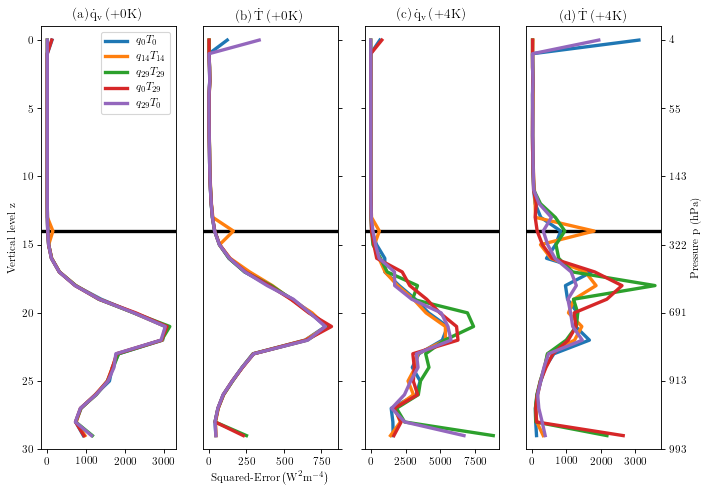

In [35]:
TITLE = [r'$\mathrm{\left(a\right)\dot{q}_{v}\left(+0K\right)}$',
         r'$\mathrm{\left(b\right)\dot{T}\left(+0K\right)}$',
         r'$\mathrm{\left(c\right)\dot{q}_{v}\left(+4K\right)}$',
         r'$\mathrm{\left(d\right)\dot{T}\left(+4K\right)}$']
YMIN = -1
YMAX = 30

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

f = plt.figure(num=None, figsize=(10,7), dpi=80, facecolor='w', edgecolor='k')

ifig = 0
for j,sst in enumerate(SST):

    ### Subplot 1 ###
    ifig += 1
    ax = f.add_subplot(1,4,ifig)

    plt.axhline(y=14,color='k',linewidth=lw,zorder=0)
    for i,nn in enumerate(NNarray):
        pU = nn.find('_')
        pm = nn.find('m')
        pe = nn.find('e')

        ax.plot(MSEv[sst][nn][:30],np.linspace(0,29,num=30),label='$q_{'+nn[pm+1:pU]+'}T_{'+nn[pe+1:]+'}$')
    if ifig==1: 
        plt.legend()
        plt.ylabel('Vertical level z')
    plt.ylim((YMIN,YMAX))
    plt.gca().invert_yaxis()
    #plt.xlabel('$\\textnormal{Squared-Error}\\left(\\textnormal{W}^{2}\\textnormal{m}^{-4}\\right)$')
    plt.title(TITLE[ifig-1])
    #plt.title(r'$\mathrm{\left(a\right)\ }$')
    
    if ifig==3:
        plt.draw()
        # Change y labels to none
        labels = [item.get_text() for item in ax.get_yticklabels()]
        for ilab,lab in enumerate(labels):
            labels[ilab]=''
        ax.set_yticklabels(labels)

    ### Subplot 2 ###
    ifig += 1
    ax = f.add_subplot(1,4,ifig)

    plt.axhline(y=14,color='k',linewidth=lw,zorder=0)
    for i,nn in enumerate(NNarray):
        ax.plot(MSEv[sst][nn][90:120],np.linspace(0,29,num=30))
    plt.ylim((YMIN,YMAX))
    plt.gca().invert_yaxis()
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    if ifig==2:
        plt.xlabel('$\\textnormal{Squared-Error}\\left(\\textnormal{W}^{2}\\textnormal{m}^{-4}\\right)$')
    elif ifig==4:
        plt.ylabel('$\\textnormal{Pressure\\ p\\ \\ensuremath{\\left(\\textnormal{hPa}\\right)}}$')
    plt.title(TITLE[ifig-1])

    plt.draw()
    # Change y labels to none
    labels = [item.get_text() for item in ax.get_yticklabels()]
    for ilab,lab in enumerate(labels):
        if ifig==2: labels[ilab]=''
        elif ifig==4: 
            IND = min(29,max(0,int(float(labels[ilab][1:-1]))))
            labels[ilab]=str('%01.0f'%coor.lev[IND].values)
    ax.set_yticklabels(labels)
    
# Save figure
plt.savefig('Fig4.pdf',format='pdf')

# 5) Pressure-latitude sections for Mike

In [16]:
MSEpl = {}

for j,sst in enumerate(SST):
    MSEpl[sst] = {}
    #print('j=',j,'and sst=',sst)
    if sst==0: data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc'
    else: data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_1'+str(sst)+'_valid.nc'
    for i,NNs in enumerate(NNarray):
        print('i =',i,' so case #',i+1+j*len(NNarray))
        # Load statistics
        md = {}; NN = {}; FOR = 'hdf5'
        #print('Loading model') # 1) Load model
        NN = load_model(TRAINDIR+'HDF5_DATA/'+NNs+'.'+FOR,custom_objects=dict_lay)
        #print('Loading statistics') # 2) Define model diagnostics object
        print(NNs)
        md = ModelDiagnostics(NN,config_fn,data_fn)
        # 3) Calculate statistics and save in pickle file
        if sst==0: path_end = 'md.pkl'
        else: path_end = 'md'+str(sst)+'K.pkl'
        md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+path_end,'rb'))
        MSEpl[sst][NNs] = md.mse_W2m4().mean(axis=(1))
    # Reference unconstrained network
    NNs = 'JNNL'; FOR = 'h5'
    print('i =',i,' so case #',i+1+j*len(NNarray))
    # Load statistics
    md = {}; NN = {};
    #print('Loading model') # 1) Load model
    NN = load_model(TRAINDIR+'HDF5_DATA/'+NNs+'.'+FOR,custom_objects=dict_lay)
    #print('Loading statistics') # 2) Define model diagnostics object
    print(NNs)
    md = ModelDiagnostics(NN,config_fn,data_fn)
    # 3) Calculate statistics and save in pickle file
    if sst==0: path_end = 'md.pkl'
    else: path_end = 'md'+str(sst)+'K.pkl'
    md.stats = pickle.load(open(TRAINDIR+'HDF5_DATA/'+NNs+path_end,'rb'))
    MSEpl[sst][NNs] = md.mse_W2m4().mean(axis=(1))

i = 0  so case # 1
Cm0_e0
i = 1  so case # 2


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm14_e14
i = 2  so case # 3


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e29
i = 3  so case # 4


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm0_e29
i = 4  so case # 5


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e0
i = 4  so case # 5


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


JNNL
i = 0  so case # 6


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm0_e0
i = 1  so case # 7


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm14_e14
i = 2  so case # 8


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e29
i = 3  so case # 9


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm0_e29
i = 4  so case # 10


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Cm29_e0
i = 4  so case # 10


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


JNNL


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


Linear version of ACnet lat-p MSE plots

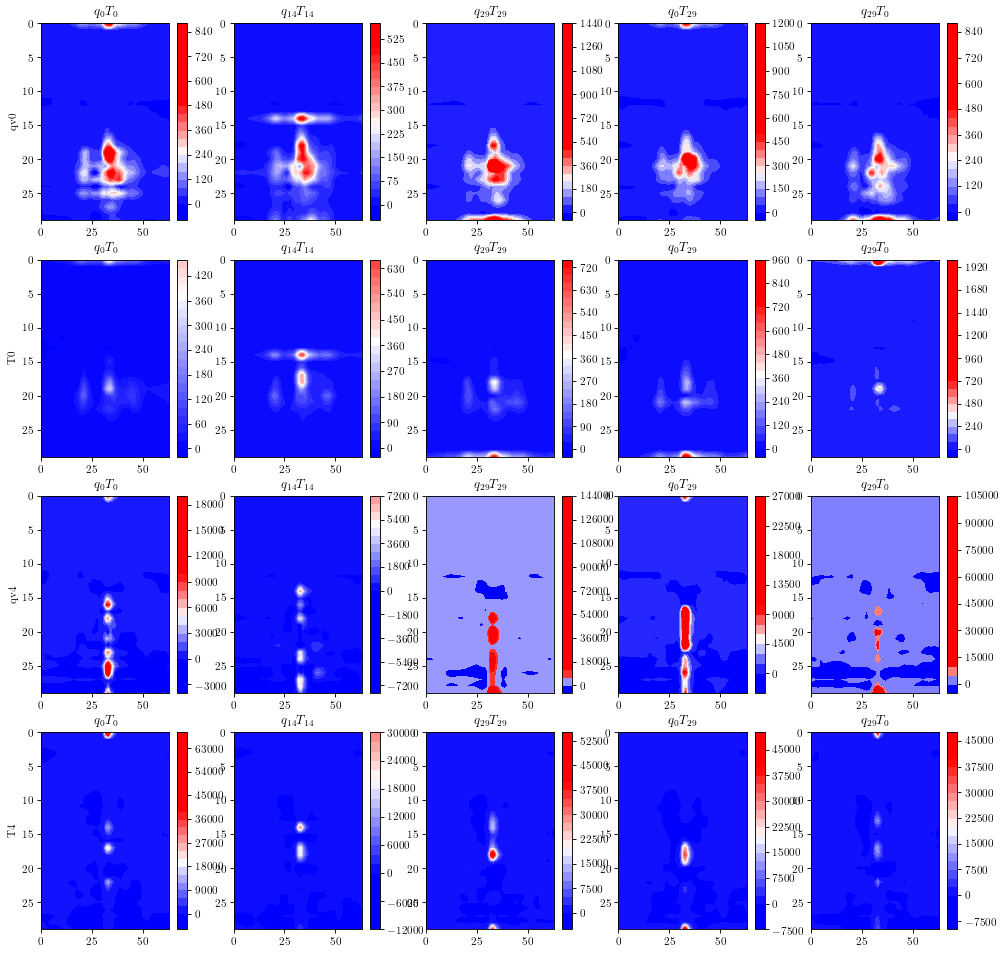

In [17]:
fz = 10
ref = 1
QMIN = {}; QMAX = {}; TMIN = {}; TMAX = {}
if ref==0:
    QMIN[0] = 0; QMIN[4] = 0;
    QMAX[0] = 20e3
    QMAX[4] = 40e3
    TMIN[0] = 0; TMIN[4] = 0;
    TMAX[0] = 4e3
    TMAX[4] = 4e4
elif ref==1:
    QMIN[0] = 0; QMAX[0] = 500;
    TMIN[0] = 0; TMAX[0] = 750;
    QMIN[4] = 0; QMAX[4] = 1e4;
    TMIN[4] = 0; TMAX[4] = 4e4;


plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

f = plt.figure(num=None, figsize=(15,15), dpi=80, facecolor='w', edgecolor='k')

X = coor.lat.values
Y = np.linspace(0,29,num=30)

ifig = 0
for j,sst in enumerate(SST):

    ### Subplot 1 ###


#     plt.axhline(y=14,color='k',linewidth=lw,zorder=0)
    for i,nn in enumerate(NNarray):
        ifig += 1
        #print(ifig)
        ax = f.add_subplot(4,5,ifig)
        pU = nn.find('_')
        pm = nn.find('m')
        pe = nn.find('e')
        C = ax.contourf(MSEpl[sst][nn][:,:30].T-ref*MSEpl[sst]['JNNL'][:,:30].T,25,cmap='bwr',vmin=0,vmax=QMAX[sst])
        plt.colorbar(C)
        plt.gca().invert_yaxis()
        plt.title(r'$q_{'+nn[pm+1:pU]+'}T_{'+nn[pe+1:]+'}$')
        if i==0: plt.ylabel('qv'+str(sst))

#     if ifig==1: 
#         plt.legend()
#         plt.ylabel('Vertical level z')
#     plt.ylim((YMIN,YMAX))
#     plt.gca().invert_yaxis()
#     #plt.xlabel('$\\textnormal{Squared-Error}\\left(\\textnormal{W}^{2}\\textnormal{m}^{-4}\\right)$')
#     plt.title(TITLE[ifig-1])
#     #plt.title(r'$\mathrm{\left(a\right)\ }$')
    
#     if ifig==3:
#         plt.draw()
#         # Change y labels to none
#         labels = [item.get_text() for item in ax.get_yticklabels()]
#         for ilab,lab in enumerate(labels):
#             labels[ilab]=''
#         ax.set_yticklabels(labels)

    ### Subplot 2 ###

#     plt.axhline(y=14,color='k',linewidth=lw,zorder=0)
    for i,nn in enumerate(NNarray):
        ifig += 1
        #print(ifig)
        ax = f.add_subplot(4,5,ifig)
        pU = nn.find('_')
        pm = nn.find('m')
        pe = nn.find('e')
        C = ax.contourf(MSEpl[sst][nn][:,90:120].T-ref*MSEpl[sst]['JNNL'][:,90:120].T,25,cmap='bwr',vmin=0,vmax=TMAX[sst])
        plt.colorbar(C)
        plt.gca().invert_yaxis()
        plt.title(r'$q_{'+nn[pm+1:pU]+'}T_{'+nn[pe+1:]+'}$')
        if i==0: plt.ylabel('T'+str(sst))
        
#     plt.ylim((YMIN,YMAX))
#     plt.gca().invert_yaxis()
#     plt.gca().yaxis.tick_right()
#     plt.gca().yaxis.set_label_position("right")
#     if ifig==2:
#         plt.xlabel('$\\textnormal{Squared-Error}\\left(\\textnormal{W}^{2}\\textnormal{m}^{-4}\\right)$')
#     elif ifig==4:
#         plt.ylabel('$\\textnormal{Pressure\\ p\\ \\ensuremath{\\left(\\textnormal{hPa}\\right)}}$')
#     plt.title(TITLE[ifig-1])

#     plt.draw()
#     # Change y labels to none
#     labels = [item.get_text() for item in ax.get_yticklabels()]
#     for ilab,lab in enumerate(labels):
#         if ifig==2: labels[ilab]=''
#         elif ifig==4: 
#             IND = min(29,max(0,int(float(labels[ilab][1:-1]))))
#             labels[ilab]=str('%01.0f'%coor.lev[IND].values)
#     ax.set_yticklabels(labels)

Log version of same plots

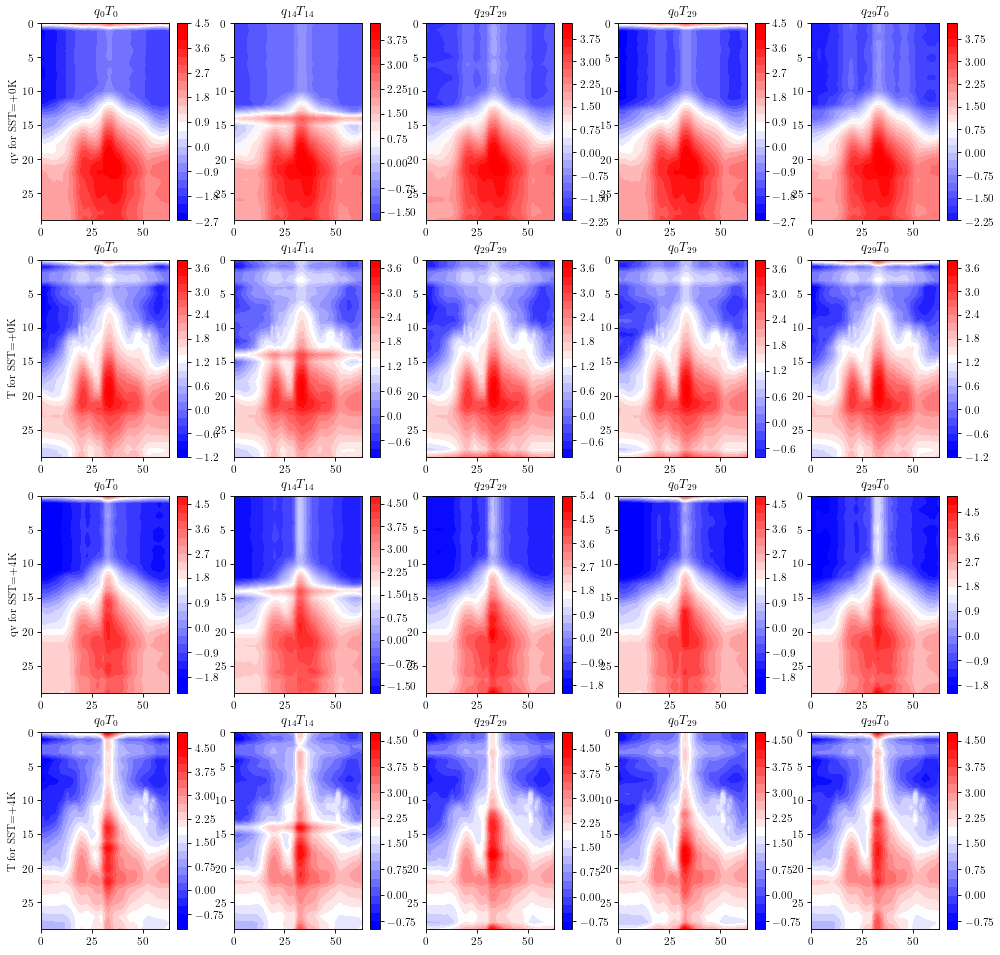

In [33]:
fz = 10
ref = 0 # 0 to show MSE, 1 to show MSE relative to UCnet
QMIN = {}; QMAX = {}; TMIN = {}; TMAX = {}
if ref==0:
    QMIN[0] = -2.5; QMAX[0] = 4
    TMIN[0] = -1; TMAX[0] = 3.6
    QMIN[4] = -1.8; QMAX[4] = 5
    TMIN[4] = -0.75; TMAX[4] = 4.5
elif ref==1:
    QMIN[0] = -4; QMAX[0] = 2.75;
    TMIN[0] = -2.5; TMAX[0] = 3;
    QMIN[4] = -3; QMAX[4] = 4.5;
    TMIN[4] = -2.25; TMAX[4] = 4.5;


plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

f = plt.figure(num=None, figsize=(15,15), dpi=80, facecolor='w', edgecolor='k')

X = coor.lat.values
Y = np.linspace(0,29,num=30)

ifig = 0
for j,sst in enumerate(SST):

    ### Subplot 1 ###

    for i,nn in enumerate(NNarray):
        ifig += 1
        ax = f.add_subplot(4,5,ifig)
        pU = nn.find('_')
        pm = nn.find('m')
        pe = nn.find('e')
        C = ax.contourf(np.log10(MSEpl[sst][nn][:,:30].T-ref*MSEpl[sst]['JNNL'][:,:30].T),
                        25,cmap='bwr',
                        vmin=QMIN[sst],vmax=QMAX[sst])
        plt.colorbar(C)
        plt.gca().invert_yaxis()
        plt.title(r'$q_{'+nn[pm+1:pU]+'}T_{'+nn[pe+1:]+'}$')
        if i==0: plt.ylabel('qv for SST=+'+str(sst)+'K')

    ### Subplot 2 ###

    for i,nn in enumerate(NNarray):
        ifig += 1
        #print(ifig)
        ax = f.add_subplot(4,5,ifig)
        pU = nn.find('_')
        pm = nn.find('m')
        pe = nn.find('e')
        C = ax.contourf(np.log10(MSEpl[sst][nn][:,90:120].T-ref*MSEpl[sst]['JNNL'][:,90:120].T),
                        25,cmap='bwr',
                        vmin=TMIN[sst],vmax=TMAX[sst])
        plt.colorbar(C)
        plt.gca().invert_yaxis()
        plt.title(r'$q_{'+nn[pm+1:pU]+'}T_{'+nn[pe+1:]+'}$')
        if i==0: plt.ylabel('T for SST=+'+str(sst)+'K')
            
# Save figure
plt.savefig('Fig4'+'_latP_minusUCnet_'+str(ref)+'.pdf',format='pdf')

In [34]:
pwd

'/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog'

In [70]:
coor.lat.shape

(64,)